In [11]:
import pandas as pd
df = pd.read_csv('Reviews.csv')
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [65]:
#Clean up Data
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final

df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)
df.head(20)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,sentimentt,random_number
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,positive,-0.334695
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1,negative,-0.315474
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,Delight says it all,This is a confection that has been around a fe...,1,positive,-0.264464
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1,negative,0.852450
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price There was a wide...,1,positive,1.535622
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,1,positive,0.689376
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great Just as good as the expensive brands,This saltwater taffy had great flavors and was...,1,positive,-0.246920
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good It is very soft and che...,1,positive,0.611570
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1,positive,-0.170163
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food Good for their...,1,positive,0.250777


In [ ]:
#pip install wordcloud

In [13]:
#Count scores
scores = df.groupby(by=["Score"]).count()
scores = scores.drop(columns=["ProductId","UserId","ProfileName","HelpfulnessNumerator","HelpfulnessDenominator","Time","Summary","Text"])
scores = scores.rename(columns={"Id":"Count"})
scores = scores.reset_index()
scores

,Score,Count
0,1,52268
1,2,29769
2,3,42640
3,4,80655
4,5,363122


<AxesSubplot:xlabel='Score'>

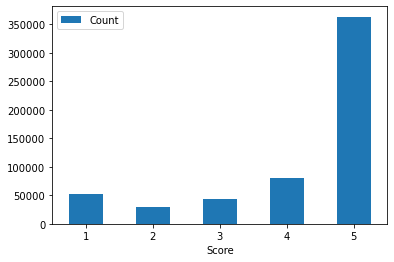

In [14]:
scores.plot.bar(x='Score', y='Count', rot=0)

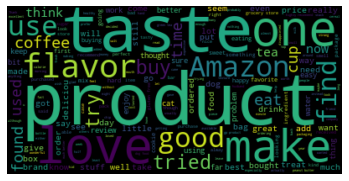

In [15]:
#import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [16]:
# scores > 3   -> Positive sentiment (+1)
# score < 3    -> negative sentiment (-1)
# remove scores of 3
df = df[df.Score != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)
df['sentiment']

0         1
1        -1
2         1
3        -1
4         1
         ..
568449    1
568450   -1
568451    1
568452    1
568453    1
Name: sentiment, Length: 525814, dtype: int64

In [30]:
#split positive and negative sentiment scores:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1].dropna()
negative

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,-1
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,-1
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",-1
...,...,...,...,...,...,...,...,...,...,...,...
568433,568434,B003XUL27E,A1JUG9WCN1A52Z,maudlin666,0,0,1,1311638400,Tastes horrible!,I just bought this soup today at my local groc...,-1
568434,568435,B003XUL27E,ABGQPE97ZVYJ3,Katherine Kelly,0,0,2,1306368000,Not so good,This soup is mostly broth. Although it has a k...,-1
568435,568436,B003XUL27E,A2PSB4WQHH46HN,carlyowu,0,2,2,1285718400,Where's the tortellini?,"It is mostly broth, with the advertised 3/4 cu...",-1
568446,568447,B001EO7N10,A2P9W8T7NTLG2Z,Andy,0,0,2,1328918400,Mixed wrong,I had ordered some of these a few months back ...,-1


In [18]:
df.loc[(df['Text'].str.contains('good').any and df['Score'] < 3)]['Text'].count()

82037

In [19]:
df.loc[(df['Text'].str.contains('great').any and df['Score'] < 3)]['Text'].count()

82037

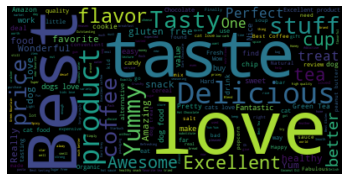

In [20]:
#Create Positive Wordcloud
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"]) 
# good and great removed because they were included in negative sentiment as shown above
pos = " ".join(review for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud22.png')
plt.show()

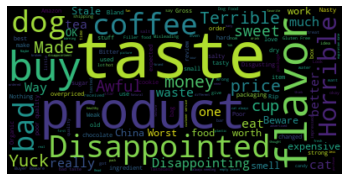

In [31]:
#Create Negative Wordcloud
neg = " ".join(review for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [32]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})

sentiment = df.groupby(by=["sentimentt"]).count()
sentiment = sentiment.drop(columns=["Id","sentiment","ProductId","UserId","ProfileName","HelpfulnessNumerator","HelpfulnessDenominator","Time","Summary","Text"])
sentiment = sentiment.reset_index()
sentiment = sentiment.rename(columns={"sentimentt":"sentiment"})
sentiment = sentiment.rename(columns={"Score":"count"})
sentiment

,sentiment,count
0,negative,82037
1,positive,443777


<AxesSubplot:xlabel='sentiment'>

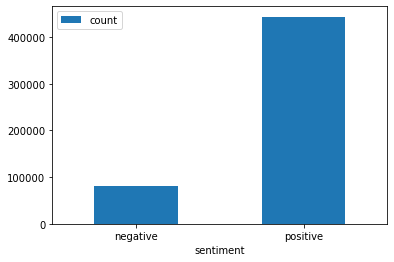

In [33]:
sentiment.plot.bar(x='sentiment', y='count', rot=0)